<a href="https://colab.research.google.com/github/BOLLOJUAISHWARYA/Google-collab-ANN/blob/main/RMSprop_optimizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_excel('Folds5x2_pp.xlsx',sheet_name='Sheet2')
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,-1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [ ]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=4, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1,activation='linear'))

In [ ]:
ann.compile(loss='mean_absolute_percentage_error', optimizer='RMSprop') 

In [ ]:
RMShist = ann.fit(X_train, Y_train, epochs=100,validation_split=0.15, batch_size=32)

Epoch 1/100
204/204 [==============================] - 1s 2ms/step - loss: 77.8042 - val_loss: 20.0834
Epoch 2/100
204/204 [==============================] - 0s 2ms/step - loss: 5.2395 - val_loss: 3.7347
Epoch 3/100
204/204 [==============================] - 0s 2ms/step - loss: 3.5655 - val_loss: 3.2253
Epoch 4/100
204/204 [==============================] - 0s 2ms/step - loss: 3.0927 - val_loss: 2.8150
Epoch 5/100
204/204 [==============================] - 0s 2ms/step - loss: 2.6689 - val_loss: 2.6639
Epoch 6/100
204/204 [==============================] - 0s 2ms/step - loss: 2.2799 - val_loss: 2.1390
Epoch 7/100
204/204 [==============================] - 1s 3ms/step - loss: 1.9327 - val_loss: 2.0940
Epoch 8/100
204/204 [==============================] - 0s 2ms/step - loss: 1.6536 - val_loss: 1.4996
Epoch 9/100
204/204 [==============================] - 0s 2ms/step - loss: 1.4328 - val_loss: 1.3160
Epoch 10/100
204/204 [==============================] - 0s 2ms/step - loss: 1.2849 - val_

In [ ]:
ann.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_85 (Dense)            (None, 4)                 20        
                                                                 
 dense_86 (Dense)            (None, 1)                 5         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_pred = ann.predict(X_test)
np.set_printoptions(precision=2)
print(y_pred)
print(np.concatenate((y_pred.reshape(len(y_pred),1),Y_test.reshape(len(Y_test),1)),1))

[[477.39]
 [444.64]
 [470.97]
 ...
 [437.25]
 [466.8 ]
 [451.94]]
[[477.39 492.39]
 [444.64 444.31]
 [470.97 478.07]
 ...
 [437.25 434.94]
 [466.8  464.12]
 [451.94 453.64]]


Text(0, 0.5, 'Loss')

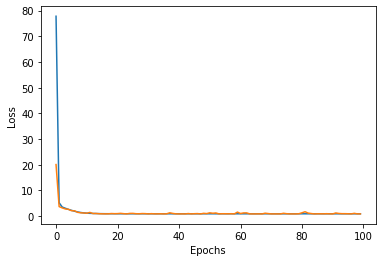

In [ ]:
plt.plot(RMShist.history['loss'])
plt.plot(RMShist.history['val_loss'])

plt.xlabel("Epochs")
plt.ylabel("Loss")